**Regresi Linear**

In [131]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

## 1. Data Frame

In [133]:
data_set = '/content/pizza.csv'
df = pd.read_csv(data_set)
df = pd.read_csv(data_set, delimiter=';')
print(df)

   Kota  Pendapatan  Penjualan
0     1           5         27
1     2          10         46
2     3          20         73
3     4           8         40
4     5           4         30
5     6           6         28
6     7          12         46
7     8          15         59


In [134]:
# Handle Missing Values
df['Pendapatan'] = df['Pendapatan'].fillna(df['Pendapatan'].mean())
df['Penjualan'] = df['Penjualan'].fillna(df['Penjualan'].mean())

In [135]:
# Handle zero variance columns by adding a small value
for column in df.columns:
    if df[column].var() == 0:
        df[column] = df[column] + 0.0001

In [136]:
# 1 adalah kolom 1 (x) // 2 adalah kolom 2 (y)
x = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, 2].values.reshape(-1, 1)

In [137]:
# Mengecek data kosong
df['Pendapatan'].isna()

,Pendapatan
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False


## 2. Scatter Diagram

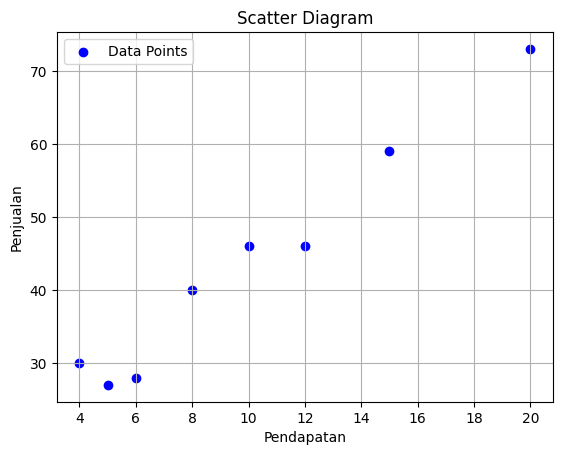

In [138]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.title('Scatter Diagram')
plt.xlabel('Pendapatan')
plt.ylabel('Penjualan')
plt.legend()
plt.grid(True)
plt.show()

## 3. Korelasi

In [145]:
correlation = np.corrcoef(x, y)[0, 1]
print(f"Korelasi antara x dan y: {correlation:.2f}")

Korelasi antara x dan y: nan


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [146]:
# Membuat model regresi
model = LinearRegression()
model.fit(x, y)

LinearRegression()

## Menghitung Slope

In [147]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

Slope: 2.90
Intercept: 14.58


## Prediksi nilai y berdasarkan model

In [148]:
y_pred = model.predict(x)

## 5. Menghitung SSR, SSE, SST, dan R^2

In [151]:
ssr = np.sum((y_pred - np.mean(y))**2)  # Sum of Squared Regression
sse = np.sum((y - y_pred)**2)           # Sum of Squared Errors
sst = np.sum((y - np.mean(y))**2)       # Total Sum of Squares
r_squared = ssr / sst                   # Koefisien Determinasi (R^2)

print(f"SSR: {ssr:.2f}")
print(f"SSE: {sse:.2f}")
print(f"SST: {sst:.2f}")
print(f"R^2: {r_squared:.2f}")

SSR: 1771.90
SSE: 57.97
SST: 1829.88
R^2: 0.97


## 6. Plot Garis Regresi

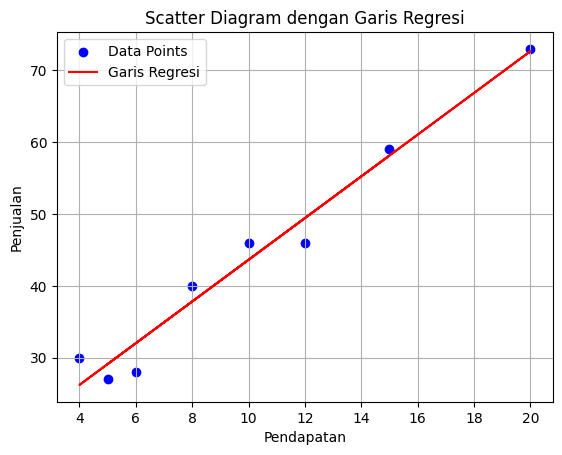

In [150]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Garis Regresi')
plt.title('Scatter Diagram dengan Garis Regresi')
plt.xlabel('Pendapatan')
plt.ylabel('Penjualan')
plt.legend()
plt.grid(True)
plt.show()